In [1]:
"""
DSS Main Assignment Section 1 - Data Analysis and Exploration

Date Created: 05/06/2022 1:27pm
Created by: Christian Shackleton

Creating a data analysis and visualisation of Jan 2019 USA domestic flight delay data, to help with understanding 
of which variables are more important for determining whether a flight will arrive on time. This data will then be
passed into a Machine Leaning Model (Random Forest Classifier) in a seperate file.

"""

### Set up enviroment
## Packages Required:
import pandas as pd # Dataframe manipulation
import numpy as np # Data organisation as multidimensional array object with vectorisation and optimisation
import matplotlib.pyplot as plt # Data Visualisation (Graphs, etc.)
import seaborn as sns # Data Visualisation (Graphs, etc.)
from sklearn.preprocessing import LabelEncoder # Creates numerical lables for classification data
import datetime # Datetime manipulation 

# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
    
## Download data
#   [hyperlink](https://www.kaggle.com/datasets/divyansh22/flight-delay-prediction)

# Create dataframes
df1 = pd.read_csv("../datasets/Jan_2019_ontime.csv")
airports = pd.read_csv("../datasets/airports.csv") #Airport code information
airlines = pd.read_csv("../datasets/airlines.csv") #Airline code information

pd.set_option('display.max_columns', None) # to force all columns being shown
    
print("The number of rows and columns present in the data are:", df1.shape) #(output: (row,column))
#print(df1.info()) # Displays summary of csv file, columns, counts, Dtypes, etc.
    
df1.head() #Pandas .head() method is used to return top n (5 by default) rows of a data frame or series.


The number of rows and columns present in the data are: (150000, 22)


,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
1,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
2,1,2,9E,20363,9E,N311PQ,3289,10685,1068502,BMI,10397,1039707,ATL,1410.0,0.0,1400-1459,1700.0,0.0,0.0,0.0,533.0,NaN
3,1,2,9E,20363,9E,N304PQ,3297,11433,1143302,DTW,11193,1119302,CVG,817.0,0.0,0800-0859,932.0,0.0,0.0,0.0,229.0,NaN
4,1,2,9E,20363,9E,N902XJ,3299,12339,1233904,IND,13487,1348702,MSP,1111.0,0.0,1100-1159,1157.0,0.0,0.0,0.0,503.0,NaN


Number of NaN Values in each column
DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                    674
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                   4297
DEP_DEL15                  4298
DEP_TIME_BLK                  0
ARR_TIME                   4479
ARR_DEL15                  4722
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              150000
dtype: int64

Number of NaN Values in each column as %
Unnamed: 21              1.000000
ARR_DEL15                0.031480
ARR_TIME                 0.029860
DEP_DEL15                0.028653
DEP_TIME                 0.028647
TAIL_NUM                 0.004493
D

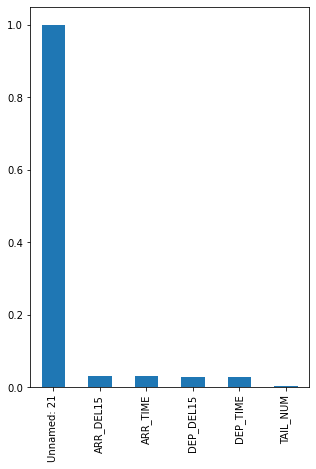

In [2]:
### Step 2: Data Cleaning
## Show NaN Values
print("Number of NaN Values in each column")
print(df1.isnull().sum()) #will indicate how many columns have NaN values, and how many values are missing.

print("\nNumber of NaN Values in each column as %")
missing_percentage = df1.isnull().sum().sort_values(ascending=False)/ len(df1) #to sort missing values as percentage
print(missing_percentage)

#missing_percentage.plot(kind='barh') # to show missing percentages across all columns (not needed here)
print("\nNumber of NaN Values in each column as % on Bar Graph")
print(missing_percentage[missing_percentage != 0].plot(kind='bar',figsize=(5,7))) # Show missing percentage as a bar graph.
                                                                           # Will show only columns with missing.

#Depending on percentage, we can decide what to do. If high, these columns can be dropped, however if low, 
#then NaN values can be filled with most frequently occuring values.

In [3]:
# Check for duplication in columns
# Neither Airport nor Carrier data have any missing values, however they each seem to have multiple references, 
# e.g. ORIGIN_AIRPORT_ID, ORIGIN_AIRPORT_SEQ_ID, and ORIGIN all seem to indicate the same piece of data.

print("""
Do ORIGIN_AIRPORT_ID and ORIGIN_AIRPORT_SEQ_ID have the same number of values as ORIGIN?""")
print(len(df1[['ORIGIN','ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID']].sort_values(by='ORIGIN')) == len(df1.ORIGIN))

print("""
Do DEST_AIRPORT_ID and DEST_AIRPORT_SEQ_ID have the same number of values as DEST?""")
print(len(df1[['DEST','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID']].sort_values(by='DEST')) == len(df1.DEST))


Do ORIGIN_AIRPORT_ID and ORIGIN_AIRPORT_SEQ_ID have the same number of values as ORIGIN?
True

Do DEST_AIRPORT_ID and DEST_AIRPORT_SEQ_ID have the same number of values as DEST?
True


In [4]:
# Identify missing values in ARR_DEL15
df_temp = df1[np.isnan(df1['ARR_DEL15'])] # df.loc[df[‘column name’] condition] <- to get values from single column
text1 = "Rows where value of ARR_DEL15 == NaN" #where the flight arrival delay are missing.
text3 = f"Number of Flights: {len(df_temp)}, or {len(df_temp)/len(df1) * 100:.2f}% of all flights."
print(text1,text3, end = '\n\n', sep = '\n')

# Identify missing values in DEP_DEL15
df_temp = df1[np.isnan(df1['DEP_DEL15'])] # df.loc[df[‘column name’] condition] <- to get values from single column
text1 = "Rows where value of DEP_DEL15 == NaN" #where the flight arrival delay are missing.
text3 = f"Number of Flights: {len(df_temp)}, or {len(df_temp)/len(df1) * 100:.2f}% of all flights."
print(text1,text3, end = '\n\n', sep = '\n')

# Identify missing values in ARR_DEL15 & DEP_DEL15
df_temp = df1.loc[(np.isnan(df1['ARR_DEL15'])) & (np.isnan(df1['DEP_DEL15']))] # df.loc[(df['col1'] == value) & (df['col2'] < value)] <- to get values from multiple columns
text1 = "Rows where value of ARR_DEL15 == NaN & DEP_DEL15 == NaN"
text2 = "(i.e. where the flight depature delay and arrival delay are missing. Check if matches cancellation)"
text3 = f"Number of Flights: {len(df_temp)}, or {len(df_temp)/len(df1) * 100:.2f}% of all flights."
print(text1,text2,text3, end = '\n\n', sep = '\n')

Rows where value of ARR_DEL15 == NaN
Number of Flights: 4722, or 3.15% of all flights.

Rows where value of DEP_DEL15 == NaN
Number of Flights: 4298, or 2.87% of all flights.

Rows where value of ARR_DEL15 == NaN & DEP_DEL15 == NaN
(i.e. where the flight depature delay and arrival delay are missing. Check if matches cancellation)
Number of Flights: 4298, or 2.87% of all flights.



In [5]:
# where the flight depature was on delayed, but still arrived on time.
df_temp = df1.loc[(df1['ARR_DEL15'] == 0) & (df1['DEP_DEL15'] == 1)]
text1 = "Rows where value of DEP_DEL15 == 1 (Yes) & ARR_DEL15 == 0 (No)"
text3 = f"Number of Flights: {len(df_temp)}, or {len(df_temp)/len(df1) * 100:.2f}% of all flights."
print(text1,text2,text3, end = '\n\n', sep = '\n')

# where the flight depature was delayed, and did not arrive on time.
df_temp = df1.loc[(df1['ARR_DEL15'] == 1) & (df1['DEP_DEL15'] == 1)]
text1 = "Rows where value of DEP_DEL15 == 1 (Yes) & ARR_DEL15 == 1 (Yes)" 
text3 = f"Number of Flights: {len(df_temp)}, or {len(df_temp)/len(df1) * 100:.2f}% of all flights."
print(text1,text2,text3, end = '\n\n', sep = '\n')

Rows where value of DEP_DEL15 == 1 (Yes) & ARR_DEL15 == 0 (No)
(i.e. where the flight depature delay and arrival delay are missing. Check if matches cancellation)
Number of Flights: 5165, or 3.44% of all flights.

Rows where value of DEP_DEL15 == 1 (Yes) & ARR_DEL15 == 1 (Yes)
(i.e. where the flight depature delay and arrival delay are missing. Check if matches cancellation)
Number of Flights: 20012, or 13.34% of all flights.



In [6]:
# where the flight depature was on time, but did not arrive on time.
df_temp = df1.loc[(df1['ARR_DEL15'] == 1) & (df1['DEP_DEL15'] == 0)]
text1 = "Rows where value of DEP_DEL15 == 0 (No) & ARR_DEL15 == 1 (Yes)" 
text3 = f"Number of Flights: {len(df_temp)}, or {len(df_temp)/len(df1) * 100:.2f}% of all flights."
print(text1,text2,text3, end = '\n\n', sep = '\n')

# where the flight depature was on time, and arrived on time.
df_temp = df1.loc[(df1['ARR_DEL15'] == 0) & (df1['DEP_DEL15'] == 0)]
text1 = "Rows where value of DEP_DEL15 == 0 (No) & ARR_DEL15 == 0 (No)" 
text3 = f"Number of Flights: {len(df_temp)}, or {len(df_temp)/len(df1) * 100:.2f}% of all flights."
print(text1,text2,text3, end = '\n\n', sep = '\n')

Rows where value of DEP_DEL15 == 0 (No) & ARR_DEL15 == 1 (Yes)
(i.e. where the flight depature delay and arrival delay are missing. Check if matches cancellation)
Number of Flights: 6949, or 4.63% of all flights.

Rows where value of DEP_DEL15 == 0 (No) & ARR_DEL15 == 0 (No)
(i.e. where the flight depature delay and arrival delay are missing. Check if matches cancellation)
Number of Flights: 113152, or 75.43% of all flights.



In [7]:
# where the flight was cancelled after take off, so a departure time was still listed
df_temp = df1.loc[(df1['CANCELLED'] == 1) & (df1['DEP_TIME'].notnull())]
text1 = "Rows where value of Canceled == 1 (Yes) & DEP_TIME != NaN" 
text3 = f"Number of Flights: {len(df_temp)}, or {len(df_temp)/len(df1) * 100:.2f}% of all flights."
print(text1,text2,text3, end = '\n\n', sep = '\n')

# where the flight was cancelled, but registered as not delayed for arrival
df_temp = df1.loc[(df1['CANCELLED'] == 1) & (df1['DEP_DEL15'] == 0)]
text1 = "Rows where value of Canceled == 1 (Yes) & ARR_DEL15 == 0 (No)"
text3 = f"Number of Flights: {len(df_temp)}, or {len(df_temp)/len(df1) * 100:.2f}% of all flights."
print(text1,text2,text3, end = '\n\n', sep = '\n')

# where the flight was Diverted, but was not confirmed delayed or not on arrival
df_temp = df1.loc[(df1['DIVERTED'] == 1) & (np.isnan(df1['DEP_DEL15']))]
text1 = "Rows where value of Diverted == 1 (Yes) & ARR_DEL15 == NaN"
text3 = f"Number of Flights: {len(df_temp)}, or {len(df_temp)/len(df1) * 100:.2f}% of all flights."
print(text1,text2,text3, end = '\n\n', sep = '\n')

Rows where value of Canceled == 1 (Yes) & DEP_TIME != NaN
(i.e. where the flight depature delay and arrival delay are missing. Check if matches cancellation)
Number of Flights: 106, or 0.07% of all flights.

Rows where value of Canceled == 1 (Yes) & ARR_DEL15 == 0 (No)
(i.e. where the flight depature delay and arrival delay are missing. Check if matches cancellation)
Number of Flights: 49, or 0.03% of all flights.

Rows where value of Diverted == 1 (Yes) & ARR_DEL15 == NaN
(i.e. where the flight depature delay and arrival delay are missing. Check if matches cancellation)
Number of Flights: 0, or 0.00% of all flights.



In [8]:
# From the above, we can determine that the majority of flights missing ARR_DEL15 values because they were cancelled.
# As we are looking at whether the flight arrives on time, we can include cancelled as not arriving on time.

# Fill NaN values for ARR_DEL15 with CANCELLED
df1['ARR_DEL15'] = df1['ARR_DEL15'].fillna(df1['CANCELLED']) 

print("Number of rows where ARR_DEL15 == NaN:",len(df1[np.isnan(df1['ARR_DEL15'])]))
#print(f"This equates to: {len(df1[np.isnan(df1['ARR_DEL15'])]) / len(df1) * 100:.2f}% rows missing values.")


# Replacing Missing values of ARR_TIME with most frequent values
df1['ARR_TIME'] = df1['ARR_TIME'].fillna(df1['ARR_TIME'].mode()[0])
print("Number of rows where ARR_TIME == NaN:",len(df1[np.isnan(df1['ARR_TIME'])]))


# Use row index 397 for check of ARR_DEL15, as row where DEP_DEL15 == NaN and ARR_DEL15 == NaN
#df1.iloc[[397]]

# Use row index 971 for check of ARR_DEL15, as row where DEP_DEL15 == 0 and ARR_DEL15 == NaN
# print("\nCheck of Row 971, where ARR_DEL15 should now equal 1.0")
# df1.iloc[[971]]

Number of rows where ARR_DEL15 == NaN: 0
Number of rows where ARR_TIME == NaN: 0


In [9]:
# Look at number of rows relating to reasons for not arriving at the location on time.

df_temp = len(df1.loc[(df1['DEP_DEL15'] == 1)])
percentage_temp = df_temp/len(df1) * 100
text1 = "Delayed Departure"
text2 = f"Number of Flights with {text1} = {df_temp}."
text3 = f"This equates to {percentage_temp:.2f}% of all flights."
print(text2,text3, end = '\n\n', sep = '\n')


df_temp = len(df1.loc[(df1['ARR_DEL15'] == 1)])
percentage_temp = df_temp/len(df1) * 100
text1 = "Delayed Arrival"
text2 = f"Number of Flights with {text1} = {df_temp}."
text3 = f"This equates to {percentage_temp:.2f}% of all flights."
print(text2,text3, end = '\n\n', sep = '\n')


df_temp = len(df1.loc[(df1['CANCELLED'] == 1)])
percentage_temp = df_temp/len(df1) * 100
text1 = "Delayed Cancelled"
text2 = f"Number of Flights with {text1} = {df_temp}."
text3 = f"This equates to {percentage_temp:.2f}% of all flights."
print(text2,text3, end = '\n\n', sep = '\n')


df_temp = len(df1.loc[(df1['DIVERTED'] == 1)])
percentage_temp = df_temp/len(df1) * 100
text1 = "Diverted"
text2 = f"Number of Flights with {text1} = {df_temp}."
text3 = f"This equates to {percentage_temp:.2f}% of all flights."
print(text2,text3, end = '\n\n', sep = '\n')

Number of Flights with Delayed Departure = 25332.
This equates to 16.89% of all flights.

Number of Flights with Delayed Arrival = 31364.
This equates to 20.91% of all flights.

Number of Flights with Delayed Cancelled = 4403.
This equates to 2.94% of all flights.

Number of Flights with Diverted = 319.
This equates to 0.21% of all flights.



In [10]:
# df1.info() # to get column numbers for insert, can delete at end.

In [11]:
## Standardise values, Cleaning & formating
# Convert all 2400 to 0000 times.
df1.loc[df1['ARR_TIME'] == 2400, 'ARR_TIME'] = 0

# Convert all Arrival time data into 60 minute time blocks, excluding 0000 - 0559 to match arrival time blocks.
df1.insert(loc = 18, column = 'ARR_TIME_BLK', 
           value =  pd.cut(df1['ARR_TIME'],[0, 600, 700, 800, 900, 1000, 1100, 1200,
                               1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400],
                                labels=['0000-0559', '0600-0659', '0700-0759', '0800-0859',
                                '0900-0959', '1000-1059', '1100-1159', '1200-1259', '1300-1359',
                                '1400-1459', '1500-1559', '1600-1659', '1700-1759', '1800-1859',
                                '1900-1959', '2000-2059', '2100-2159', '2200-2259', '2300-2359'],
                                right=False, include_lowest=True) )
            

# df1.iloc[[971]] # To test for is NaN value kept.

In [12]:
# Convert all Distance data into 100 mile blocks.
df1.insert(loc = 21, column = 'DISTANCE_BLK', 
           value =  pd.qcut(df1['DISTANCE'], q = 10, precision = 0)  )

df1.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,ARR_TIME_BLK,CANCELLED,DIVERTED,DISTANCE_BLK,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,1600-1659,0.0,0.0,"(30.0, 224.0]",223.0,NaN
1,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,1900-1959,0.0,0.0,"(528.0, 640.0]",579.0,NaN
2,1,2,9E,20363,9E,N311PQ,3289,10685,1068502,BMI,10397,1039707,ATL,1410.0,0.0,1400-1459,1700.0,0.0,1700-1759,0.0,0.0,"(528.0, 640.0]",533.0,NaN
3,1,2,9E,20363,9E,N304PQ,3297,11433,1143302,DTW,11193,1119302,CVG,817.0,0.0,0800-0859,932.0,0.0,0900-0959,0.0,0.0,"(224.0, 323.0]",229.0,NaN
4,1,2,9E,20363,9E,N902XJ,3299,12339,1233904,IND,13487,1348702,MSP,1111.0,0.0,1100-1159,1157.0,0.0,1100-1159,0.0,0.0,"(409.0, 528.0]",503.0,NaN


In [13]:
# Of the Data present, we will want to keep:

# 'DAY_OF_WEEK' because delay could depend on traffic in specific days: change to weekend, holiday, working_day
# 'ORIGIN' Identifies the origin airport
# 'DEST' Identifies the destination airport
# 'OP_CARRIER' because the airline chosen may impact on frequency of delays/cancelations.
# 'DEP_TIME_BLK' because rough time of day is more practical, and will still help indicate busy periods.
# 'ARR_TIME_BLK', (created from ARR_TIME) may help indicate busy periods that could delay arrival.
# 'ARR_DEL15' the key value to consider for training/predicting.
# 'DISTANCE_BLK' (created from DISTANCE) because maybe the distance will have an impact on arrival time accuracy.

# Based on the above, we will drop:
# 'Unnamed: 21' as it is 100% NaN Values.
df1.drop(['Unnamed: 21'], inplace=True, axis=1)

# 'ORIGIN_AIRPORT_SEQ_ID/ORIGIN_AIRPORT_ID', as they are represented elsewhere by 'ORIGIN'.
df1.drop(['ORIGIN_AIRPORT_SEQ_ID'], inplace=True, axis=1)
df1.drop(['ORIGIN_AIRPORT_ID'], inplace=True, axis=1)

# 'DEST_AIRPORT_SEQ_ID/DEST_AIRPORT_ID' as they are represented elsewhere by 'DEST' & 'DEST_AIRPORT_ID'.
df1.drop(['DEST_AIRPORT_SEQ_ID'], inplace=True, axis=1)
df1.drop(['DEST_AIRPORT_ID'], inplace=True, axis=1)

# 'OP_UNIQUE_CARRIER'/'OP_CARRIER_AIRLINE_ID', as they are represented elsewhere by 'OP_CARRIER'.
df1.drop(['OP_UNIQUE_CARRIER'], inplace=True, axis=1)
df1.drop(['OP_CARRIER_AIRLINE_ID'], inplace=True, axis=1)

# 'DEP_TIME' because it contains NaN values, and we will use DEP_TIME_BLK instead.
df1.drop(['DEP_TIME'], inplace=True, axis=1)

# 'ARR_TIME' because it has been used, and we will use ARR_TIME_BLK instead.
df1.drop(['ARR_TIME'], inplace=True, axis=1)

# 'OP_CARRIER_FL_NUM', because this is represented by the OP_CARRIER_AIRLINE_ID/'ORIGIN_AIRPORT_ID'
# /'DEST_AIRPORT_ID'/'DEP_TIME_BLK'
df1.drop(['OP_CARRIER_FL_NUM'], inplace=True, axis=1)

# 'TAIL_NUM'
df1.drop(['TAIL_NUM'], inplace=True, axis=1)

# 'DEP_DEL15', 
df1.drop(['DEP_DEL15'], inplace=True, axis=1)

# 'DIVERTED'
df1.drop(['DIVERTED'], inplace=True, axis=1)

# 'CANCELLED', these values have been extracted into 'ARR_DEL15'.
df1.drop(['CANCELLED'], inplace=True, axis=1)

# 'DISTANCE', these values have been extracted into 'DISTANCE_BLK'
df1.drop(['DISTANCE'], inplace=True, axis=1)

# 'DAY_OF_MONTH' while there may be a correlation with public holidays, the majority of states only have 1st of Jan.
df1.drop(['DAY_OF_MONTH'], inplace=True, axis=1)

df1.head()

,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_TIME_BLK,ARR_DEL15,ARR_TIME_BLK,DISTANCE_BLK
0,2,9E,TLH,ATL,1500-1559,0.0,1600-1659,"(30.0, 224.0]"
1,2,9E,ATL,FSM,1900-1959,0.0,1900-1959,"(528.0, 640.0]"
2,2,9E,BMI,ATL,1400-1459,0.0,1700-1759,"(528.0, 640.0]"
3,2,9E,DTW,CVG,0800-0859,0.0,0900-0959,"(224.0, 323.0]"
4,2,9E,IND,MSP,1100-1159,0.0,1100-1159,"(409.0, 528.0]"


In [14]:
# Replace OP_CARRIER from Code to Name
df1 = pd.merge(left = df1, right = airlines.rename(columns = {'IATA_CODE':'OP_CARRIER'}), on = "OP_CARRIER", how = "left")

# Replace ORIGIN from Code to Name
airports_temp = airports.rename(columns = {'IATA_CODE':'ORIGIN','AIRPORT':'Origin_Airport'}).copy()
df1 = pd.merge(left = df1, right = airports_temp[['ORIGIN','Origin_Airport']],on='ORIGIN', how='left')

# Replace DEST from Code to Name
airports_temp = airports.rename(columns = {'IATA_CODE':'DEST','AIRPORT':'Destination_Airport'}).copy()
df1 = pd.merge(left = df1, right = airports_temp[['DEST','Destination_Airport']],on='DEST', how='left')

# Extracting only certain column from second dataframe
# df1 = pd.merge(left = df1, right = airports[['Key_Column on Right','Target_Column on Right']],on='Key_Column on left', how='left')

df1.head()

,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_TIME_BLK,ARR_DEL15,ARR_TIME_BLK,DISTANCE_BLK,AIRLINE,Origin_Airport,Destination_Airport
0,2,9E,TLH,ATL,1500-1559,0.0,1600-1659,"(30.0, 224.0]",Endeavor Air,Tallahassee International Airport,Hartsfield-Jackson Atlanta International Airport
1,2,9E,ATL,FSM,1900-1959,0.0,1900-1959,"(528.0, 640.0]",Endeavor Air,Hartsfield-Jackson Atlanta International Airport,Fort Smith Regional Airport
2,2,9E,BMI,ATL,1400-1459,0.0,1700-1759,"(528.0, 640.0]",Endeavor Air,Central Illinois Regional Airport at Bloomingt...,Hartsfield-Jackson Atlanta International Airport
3,2,9E,DTW,CVG,0800-0859,0.0,0900-0959,"(224.0, 323.0]",Endeavor Air,Detroit Metropolitan Airport,Cincinnati/Northern Kentucky International Air...
4,2,9E,IND,MSP,1100-1159,0.0,1100-1159,"(409.0, 528.0]",Endeavor Air,Indianapolis International Airport,Minneapolis-Saint Paul International Airport


In [15]:
# Check to ensure no missing values in new columns
df1[df1.isnull().any(axis=1)] #null_data

# df1.isnull().sum() #will indicate how many columns have NaN values, and how many values are missing.

,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_TIME_BLK,ARR_DEL15,ARR_TIME_BLK,DISTANCE_BLK,AIRLINE,Origin_Airport,Destination_Airport


In [16]:
# Drop Replaced Columns
df1.drop(['OP_CARRIER','ORIGIN','DEST'], inplace=True, axis=1)

df1.head()

,DAY_OF_WEEK,DEP_TIME_BLK,ARR_DEL15,ARR_TIME_BLK,DISTANCE_BLK,AIRLINE,Origin_Airport,Destination_Airport
0,2,1500-1559,0.0,1600-1659,"(30.0, 224.0]",Endeavor Air,Tallahassee International Airport,Hartsfield-Jackson Atlanta International Airport
1,2,1900-1959,0.0,1900-1959,"(528.0, 640.0]",Endeavor Air,Hartsfield-Jackson Atlanta International Airport,Fort Smith Regional Airport
2,2,1400-1459,0.0,1700-1759,"(528.0, 640.0]",Endeavor Air,Central Illinois Regional Airport at Bloomingt...,Hartsfield-Jackson Atlanta International Airport
3,2,0800-0859,0.0,0900-0959,"(224.0, 323.0]",Endeavor Air,Detroit Metropolitan Airport,Cincinnati/Northern Kentucky International Air...
4,2,1100-1159,0.0,1100-1159,"(409.0, 528.0]",Endeavor Air,Indianapolis International Airport,Minneapolis-Saint Paul International Airport


In [17]:
## Data Exploration
# If it is desired to export any graphs
# plt.savefig('figure.pdf',format='pdf') #saving the plot as a pdf file of name figure

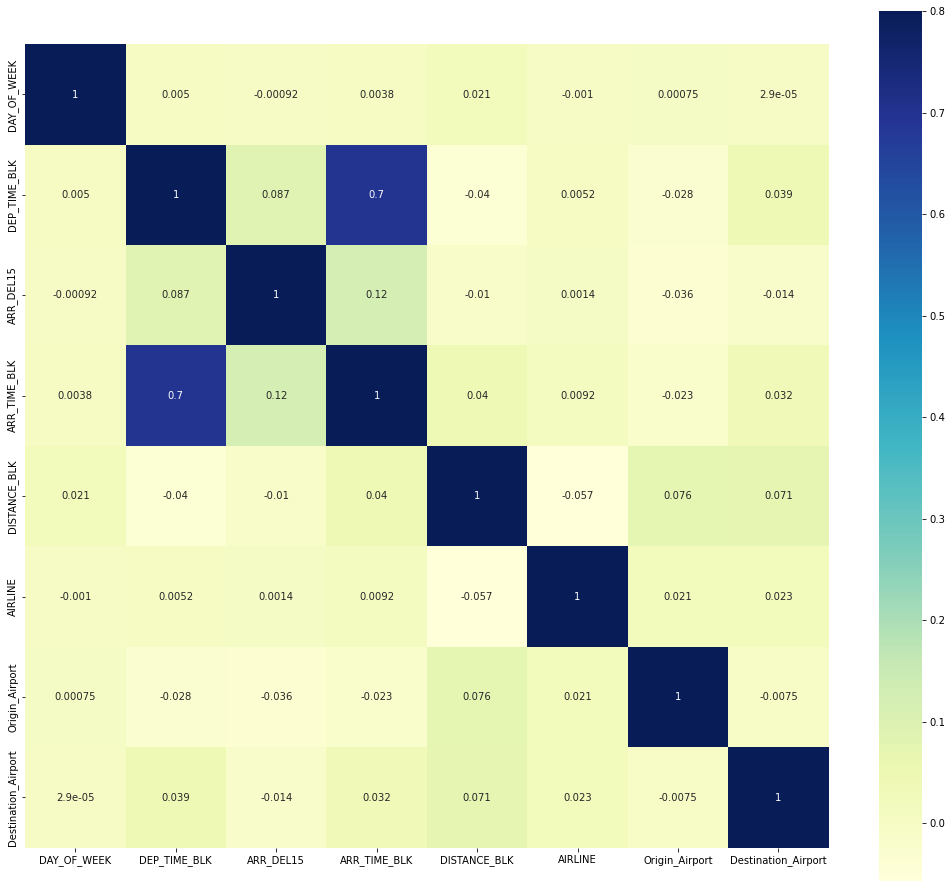

In [18]:
## Feature selection using Pearson Correlation
#df1.corr() #raw data output
# correlation matrix

le = LabelEncoder() # Convert catregorical data to numeric using self assigned numeric values for each class. Also for numeric data

df_corr = df1.copy()
for i in df1.columns:
    df_corr[i] = le.fit_transform(df_corr[i]) # Converts to numeric values for correlation

corrmat = df_corr.corr()
f, ax = plt.subplots(figsize=(18, 16))
sns.heatmap(corrmat, vmax=.8, square=True,  cmap="YlGnBu",annot=True);
plt.show()

In [19]:
text1 = """
Based on Pearson Correlation, there doesn't appear to be any defininte correlation between the flight 
not arriving on time with any other value, however the strongest links are between Delay and Arrival & 
Departure Time, and then Airline & Origin Airport. This could indicate that there  and airports which 
have a systematic delay issue with busy times, that is independant of which day of the week it is.

Explore manually via graphs
"""
print(text1)


Based on Pearson Correlation, there doesn't appear to be any defininte correlation between the flight 
not arriving on time with any other value, however the strongest links are between Delay and Arrival & 
Departure Time, and then Airline & Origin Airport. This could indicate that there  and airports which 
have a systematic delay issue with busy times, that is independant of which day of the week it is.

Explore manually via graphs



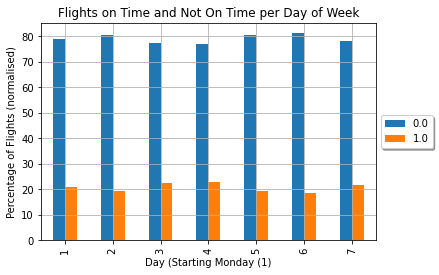

DAY_OF_WEEK represents whether the flight was on:

1: Monday 
2: Tuesday 
3: Wednesday 
4: Thursday  
5: Friday  
6: Saturday 
7: Sunday


In [20]:
## Day of the Week Weighting
# Number of Flights and Delays per Day
# days_arrived_delayed = df1[['DAY_OF_WEEK','ARR_DEL15']].groupby('DAY_OF_WEEK').sum().sort_values(by='ARR_DEL15',ascending=False)

graph = (pd.crosstab(df1['DAY_OF_WEEK'],df1['ARR_DEL15'], normalize='index').round(4)*100).plot.bar()
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True)
plt.title("Flights on Time and Not On Time per Day of Week")
plt.xlabel("Day (Starting Monday (1)")
plt.ylabel("Percentage of Flights (normalised)")
plt.grid(True)

plt.show()
print('DAY_OF_WEEK represents whether the flight was on:\n\n'
      '1: Monday \n2: Tuesday \n3: Wednesday \n4: Thursday  \n5: Friday  \n6: Saturday \n7: Sunday')

Flights on Time and Not On Time per DEP_TIME_BLK


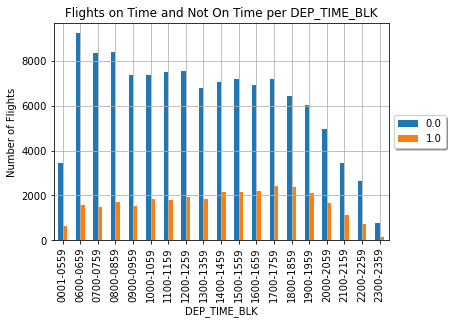

<Figure size 720x720 with 0 Axes>

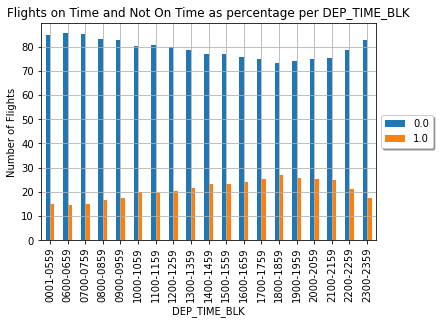

<Figure size 720x720 with 0 Axes>

Flights on Time and Not On Time per ARR_TIME_BLK


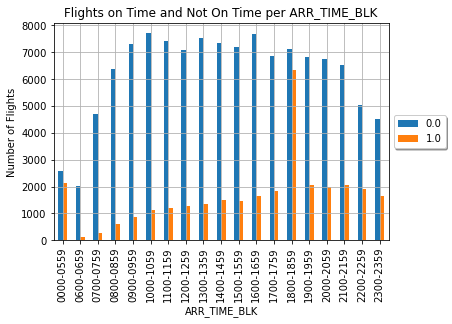

<Figure size 720x720 with 0 Axes>

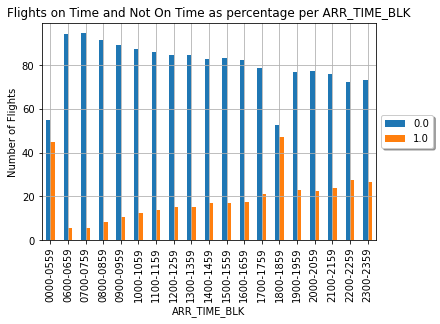

<Figure size 720x720 with 0 Axes>

In [21]:
## Time Weighting - Departure
print("Flights on Time and Not On Time per DEP_TIME_BLK")
# Total Flights
graph = pd.crosstab(df1['DEP_TIME_BLK'],df1['ARR_DEL15']).plot.bar()
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True)
plt.title("Flights on Time and Not On Time per DEP_TIME_BLK")
plt.xlabel("DEP_TIME_BLK")
plt.ylabel("Number of Flights")
plt.grid(True)
plt.figure(figsize=(10, 10))
plt.tight_layout()

plt.show()

# Normalised
graph = (pd.crosstab(df1['DEP_TIME_BLK'],df1['ARR_DEL15'], normalize='index').round(4)*100).plot.bar()
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True)
plt.title("Flights on Time and Not On Time as percentage per DEP_TIME_BLK")
plt.xlabel("DEP_TIME_BLK")
plt.ylabel("Number of Flights")
plt.grid(True)
plt.figure(figsize=(10, 10))
plt.tight_layout()

plt.show()


## Time Weighting - Arrival
print("Flights on Time and Not On Time per ARR_TIME_BLK")
# Total Flights
graph = pd.crosstab(df1['ARR_TIME_BLK'],df1['ARR_DEL15']).plot.bar()
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True)
plt.title("Flights on Time and Not On Time per ARR_TIME_BLK")
plt.xlabel("ARR_TIME_BLK")
plt.ylabel("Number of Flights")
plt.grid(True)
plt.figure(figsize=(10, 10))
plt.tight_layout()

plt.show()


# Normalised
graph = (pd.crosstab(df1['ARR_TIME_BLK'],df1['ARR_DEL15'], normalize='index').round(4)*100).plot.bar()
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True)
plt.title("Flights on Time and Not On Time as percentage per ARR_TIME_BLK")
plt.xlabel("ARR_TIME_BLK")
plt.ylabel("Number of Flights")
plt.grid(True)
plt.figure(figsize=(10, 10))
plt.tight_layout()

plt.show()

The number of unique airlines present in the data is: 17 

The number of flights per airlines present in the data is:

Southwest Airlines Co.          28681
American Airlines Inc.          19778
Delta Air Lines Inc.            18787
Skywest Airlines Inc.           16708
United Air Lines Inc.           11940
Midwest Airlines                 6662
American Eagle Airlines Inc.     6618
JetBlue Airways                  6315
PSA Airlines                     5893
Alaska Airlines Inc.             5340
Endeavor Air                     5269
Mesa Airlines                    4666
Spirit Air Lines                 3966
Atlantic Southeast Airlines      3434
Frontier Airlines Inc.           2487
Allegiant Air                    1765
Hawaiian Airlines Inc.           1691
Name: AIRLINE, dtype: int64


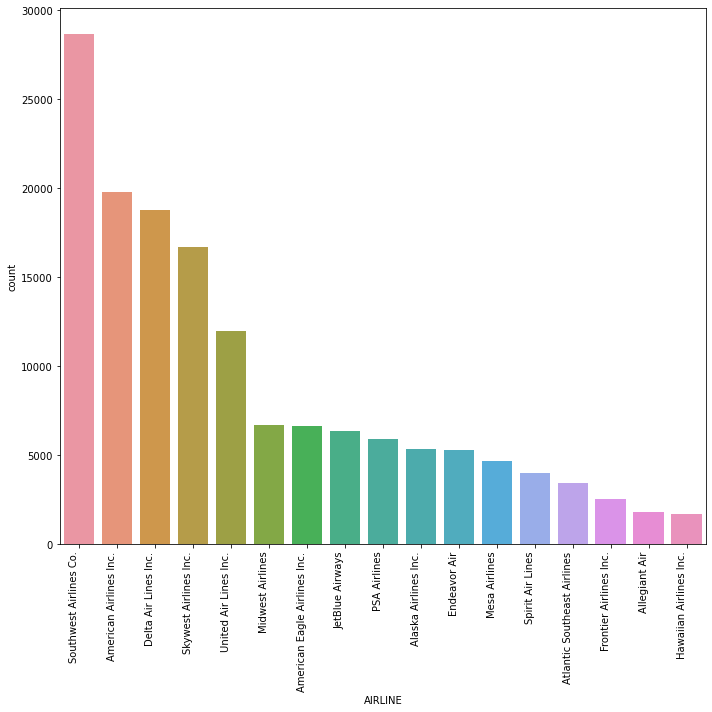

In [22]:
## Airline Weighting
#Determine which airlines have the most number of flights in data

# Finding unique airlines in 'AIRLINE' column.
airlines=df1.AIRLINE.unique() 
print("The number of unique airlines present in the data is:", len(airlines), '\n')

# number of flights per airline
print("The number of flights per airlines present in the data is:\n")
print(df1['AIRLINE'].value_counts())

# Pie Chart of flights per airline, percentage.... isn't showing correct percentages for some reason.
# axis = plt.subplots(figsize=(10,14))
# Name = df1["AIRLINE"].unique()
# size = df1["AIRLINE"].value_counts()
# plt.pie(size,labels=Name,autopct='%5.0f%%')
# plt.show()

#Graph Option 1 - Basic
# airline_flights.plot(kind='bar')
# plt.title("Flights per Airline")
# plt.xlabel("Airline")
# plt.ylabel("Number of Flights")
# plt.grid(True)

#Graph Option 2 - Coulourful
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=df1['AIRLINE'], data = df1,
              order=df1['AIRLINE'].value_counts().iloc[:].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()


plt.show()

The number of Delays per airlines present in the data is:


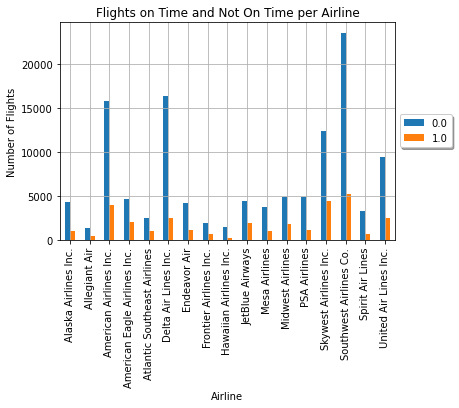

<Figure size 720x720 with 0 Axes>

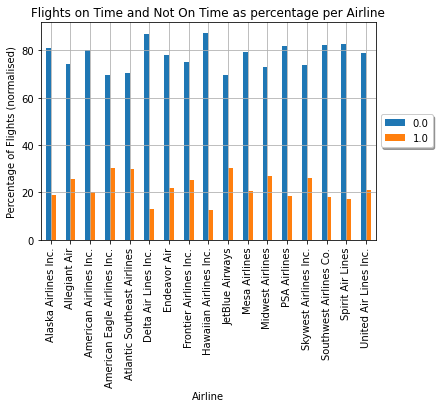

<Figure size 720x720 with 0 Axes>

In [23]:
# number of delays per airline
# airlines_ontime = df1.groupby(['AIRLINE']).ARR_DEL15.value_counts()[0::2] # Can't sort in order of count
# airlines_delayed = df1.groupby(['AIRLINE']).ARR_DEL15.value_counts()[1::2]# Can't sort in order of count
# airlines_arrived_delayed = df1[['AIRLINE','ARR_DEL15']].groupby('AIRLINE').sum().sort_values(by='ARR_DEL15',ascending=False) # In order as I wan

# Graph
graph = pd.crosstab(df1['AIRLINE'],df1['ARR_DEL15']).plot.bar()
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True)
plt.title("Flights on Time and Not On Time as percentage per Airline")
plt.title("Flights on Time and Not On Time per Airline")
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.grid(True)
plt.figure(figsize=(10, 10))
plt.tight_layout()

print("The number of Delays per airlines present in the data is:")
plt.show()


# number of delays per airline as percentage of number of flights
# airline_percents=df1[['AIRLINE','ARR_DEL15']].groupby('AIRLINE').agg(['mean','count']).sort_values(by=('ARR_DEL15','mean'), ascending=False)
# Graph
graph = (pd.crosstab(df1['AIRLINE'],df1['ARR_DEL15'], normalize='index').round(4)*100).plot.bar()
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True)
plt.title("Flights on Time and Not On Time as percentage per Airline")
plt.xlabel("Airline")
plt.ylabel("Percentage of Flights (normalised)")
plt.grid(True)
plt.figure(figsize=(10, 10))
plt.tight_layout()

plt.show()

In [24]:
# Location Weighting
# Number of Unique Airports for Departure
print("The number of unique Airports for Origin:", len(df1.Origin_Airport.unique()), '\n')

# Number of Unique Airports for Arrival
print("The number of unique Airports for Destination:", len(df1.Destination_Airport.unique()), '\n')

cats = 13

print(f"This is too many to graph, let us bin them into {cats} groups each, based upon on number of on time values")


origin_df = df1[['Origin_Airport','ARR_DEL15']].groupby('Origin_Airport').sum().sort_values(by='ARR_DEL15',ascending=False)
origin_df['ORIGIN_cat'] = pd.qcut(origin_df['ARR_DEL15'], cats, labels = False)
print(origin_df.head())


dest_df = df1[['Destination_Airport','ARR_DEL15']].groupby('Destination_Airport').sum().sort_values(by='ARR_DEL15',ascending=False)
dest_df['DEST_cat'] = pd.qcut(dest_df['ARR_DEL15'], cats, labels = False)
print(dest_df.head())


The number of unique Airports for Origin: 345 

The number of unique Airports for Destination: 345 

This is too many to graph, let us bin them into 13 groups each, based upon on number of on time values
                                                  ARR_DEL15  ORIGIN_cat
Origin_Airport                                                         
Chicago O'Hare International Airport                 2659.0          12
LaGuardia Airport (Marine Air Terminal)              1196.0          12
Dallas/Fort Worth International Airport              1173.0          12
Hartsfield-Jackson Atlanta International Airport     1083.0          12
San Francisco International Airport                  1063.0          12
                                                  ARR_DEL15  DEST_cat
Destination_Airport                                                  
Chicago O'Hare International Airport                 2392.0        12
LaGuardia Airport (Marine Air Terminal)              1333.0        12
Dallas/Fort 

In [25]:
data_origin = origin_df.loc[df1['Origin_Airport']].reset_index()
df1['ORIGIN_cat'] = data_origin['ORIGIN_cat']

data_dest = dest_df.loc[df1['Destination_Airport']].reset_index()
df1['DEST_cat'] = data_dest['DEST_cat']

# df1.head()

In [26]:
# Reorder Columns
df1 = df1[['DAY_OF_WEEK','AIRLINE','Origin_Airport','ORIGIN_cat','Destination_Airport','DEST_cat','DEP_TIME_BLK','ARR_TIME_BLK','DISTANCE_BLK','ARR_DEL15']]

df1.head()

,DAY_OF_WEEK,AIRLINE,Origin_Airport,ORIGIN_cat,Destination_Airport,DEST_cat,DEP_TIME_BLK,ARR_TIME_BLK,DISTANCE_BLK,ARR_DEL15
0,2,Endeavor Air,Tallahassee International Airport,7,Hartsfield-Jackson Atlanta International Airport,12,1500-1559,1600-1659,"(30.0, 224.0]",0.0
1,2,Endeavor Air,Hartsfield-Jackson Atlanta International Airport,12,Fort Smith Regional Airport,4,1900-1959,1900-1959,"(528.0, 640.0]",0.0
2,2,Endeavor Air,Central Illinois Regional Airport at Bloomingt...,7,Hartsfield-Jackson Atlanta International Airport,12,1400-1459,1700-1759,"(528.0, 640.0]",0.0
3,2,Endeavor Air,Detroit Metropolitan Airport,12,Cincinnati/Northern Kentucky International Air...,11,0800-0859,0900-0959,"(224.0, 323.0]",0.0
4,2,Endeavor Air,Indianapolis International Airport,11,Minneapolis-Saint Paul International Airport,12,1100-1159,1100-1159,"(409.0, 528.0]",0.0


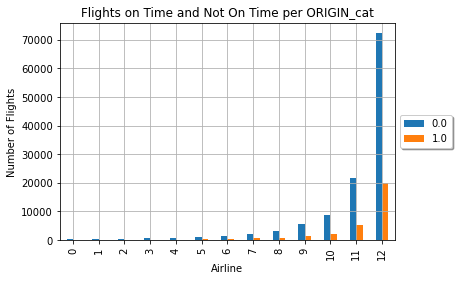

<Figure size 720x720 with 0 Axes>

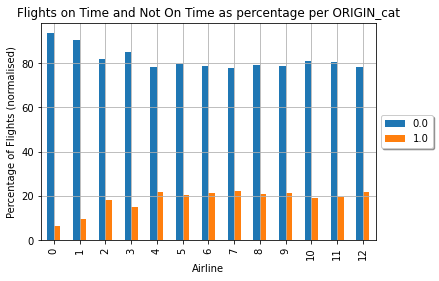

<Figure size 720x720 with 0 Axes>

In [27]:
# Graph Origin Airport
graph = pd.crosstab(df1['ORIGIN_cat'],df1['ARR_DEL15']).plot.bar()
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True)

plt.title("Flights on Time and Not On Time per ORIGIN_cat")
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.grid(True)
plt.figure(figsize=(10, 10))
plt.tight_layout()

plt.show()


# number of delays per airline as percentage of number of flights
# airline_percents=df1[['AIRLINE','ARR_DEL15']].groupby('AIRLINE').agg(['mean','count']).sort_values(by=('ARR_DEL15','mean'), ascending=False)
# Graph
graph = (pd.crosstab(df1['ORIGIN_cat'],df1['ARR_DEL15'], normalize='index').round(4)*100).plot.bar()
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True)
plt.title("Flights on Time and Not On Time as percentage per ORIGIN_cat")
plt.xlabel("Airline")
plt.ylabel("Percentage of Flights (normalised)")
plt.grid(True)
plt.figure(figsize=(10, 10))
plt.tight_layout()

plt.show()

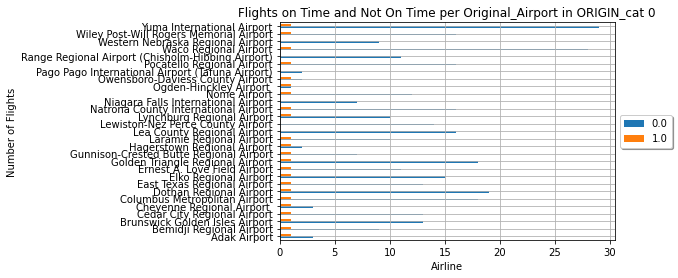

<Figure size 720x720 with 0 Axes>

None


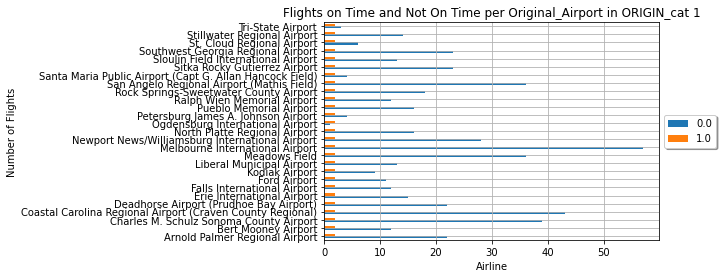

<Figure size 720x720 with 0 Axes>

None


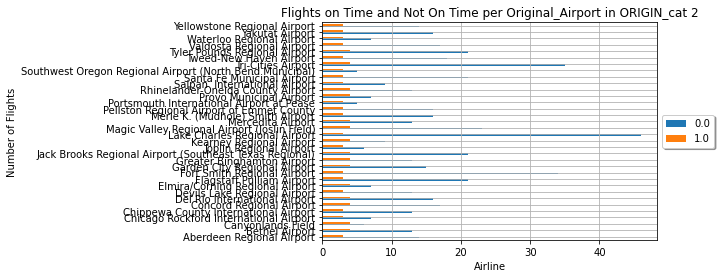

<Figure size 720x720 with 0 Axes>

None


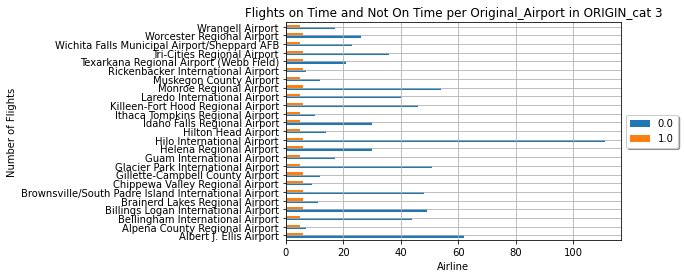

<Figure size 720x720 with 0 Axes>

None


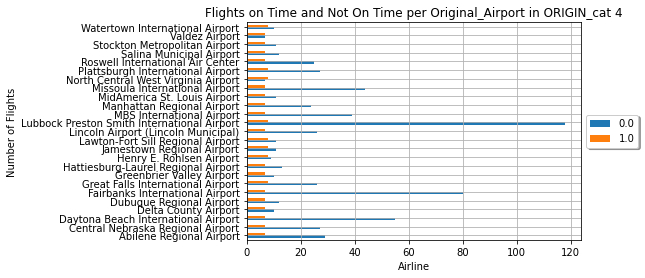

<Figure size 720x720 with 0 Axes>

None


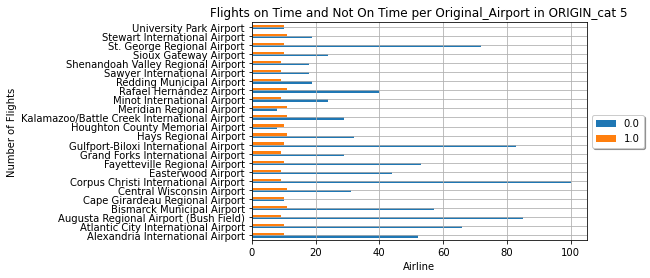

<Figure size 720x720 with 0 Axes>

None


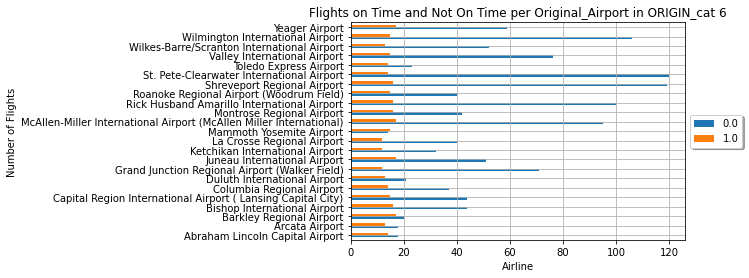

<Figure size 720x720 with 0 Axes>

None


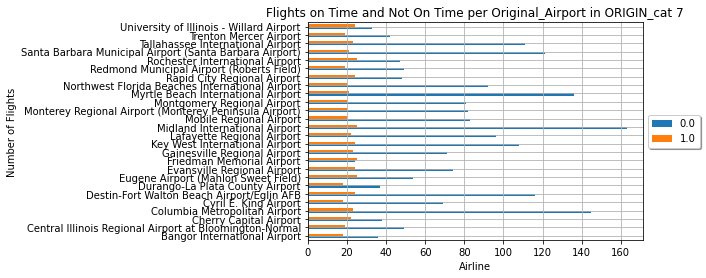

<Figure size 720x720 with 0 Axes>

None


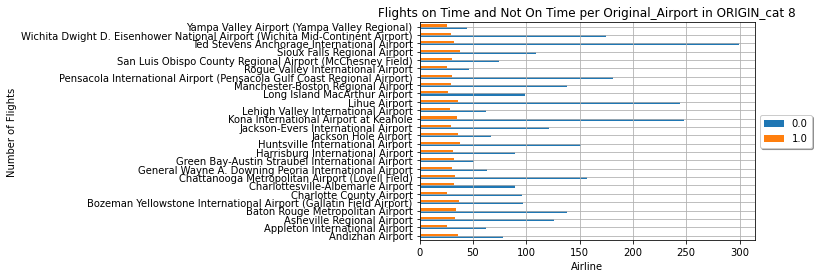

<Figure size 720x720 with 0 Axes>

None


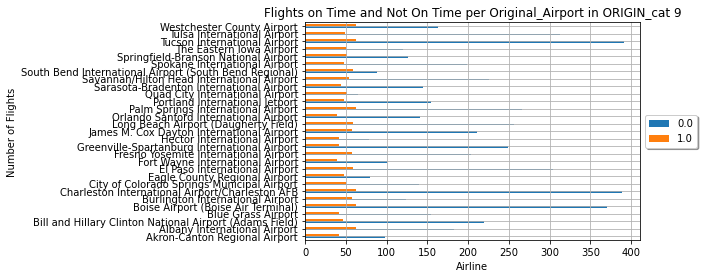

<Figure size 720x720 with 0 Axes>

None


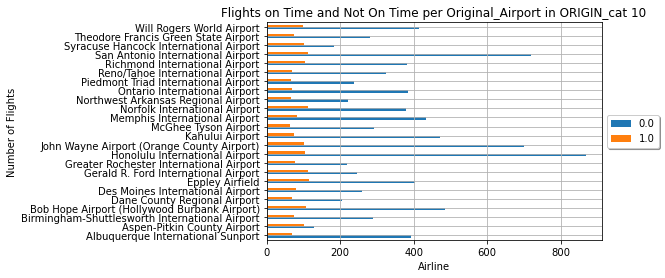

<Figure size 720x720 with 0 Axes>

None


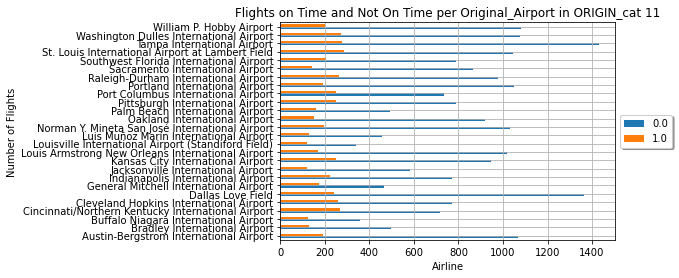

<Figure size 720x720 with 0 Axes>

None


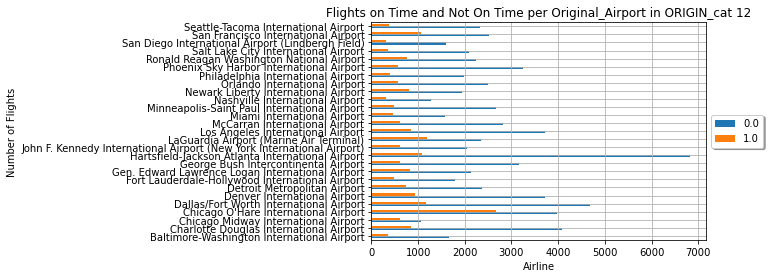

<Figure size 720x720 with 0 Axes>

None


In [28]:
# number of delays per Origin_Airport as total of number of flights
# Graph

for i in range(cats):
    airlines_cat = df1.loc[df1['ORIGIN_cat'].values == i]
    graph = pd.crosstab(airlines_cat['Origin_Airport'],airlines_cat['ARR_DEL15']).plot.barh()
    graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True)
    plt.title(f"Flights on Time and Not On Time per Original_Airport in ORIGIN_cat {i}")
    plt.xlabel("Airline")
    plt.ylabel("Number of Flights")
    plt.grid(True)
    plt.figure(figsize=(10, 10))
    plt.tight_layout()
    print(plt.show())

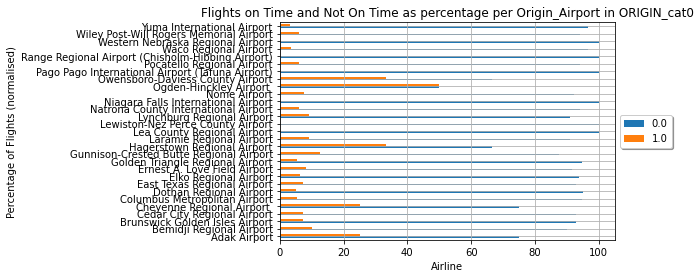

<Figure size 720x720 with 0 Axes>

None


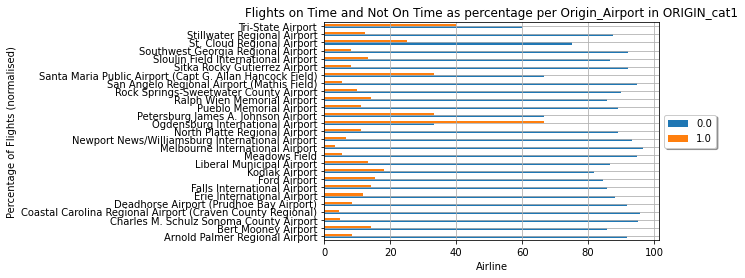

<Figure size 720x720 with 0 Axes>

None


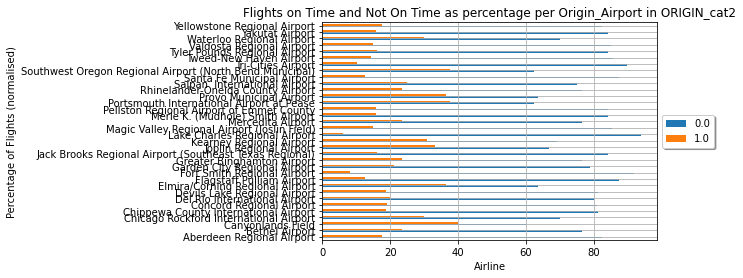

<Figure size 720x720 with 0 Axes>

None


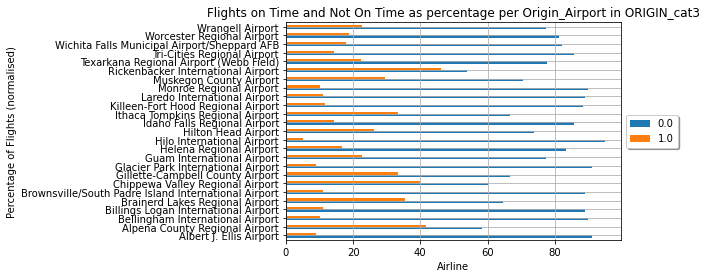

<Figure size 720x720 with 0 Axes>

None


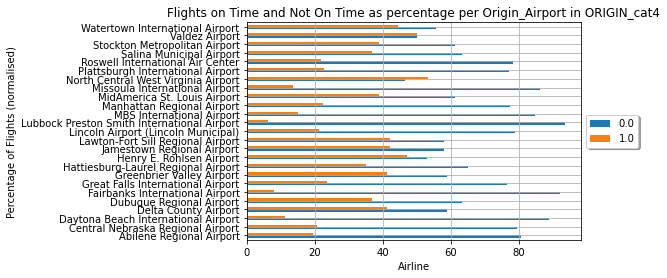

<Figure size 720x720 with 0 Axes>

None


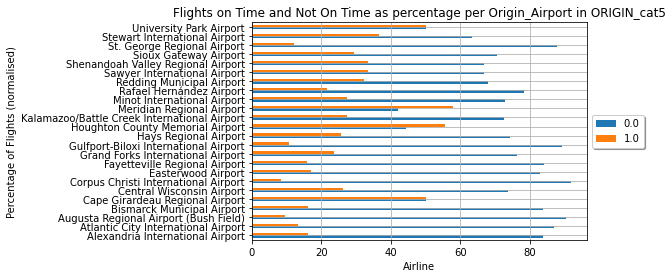

<Figure size 720x720 with 0 Axes>

None


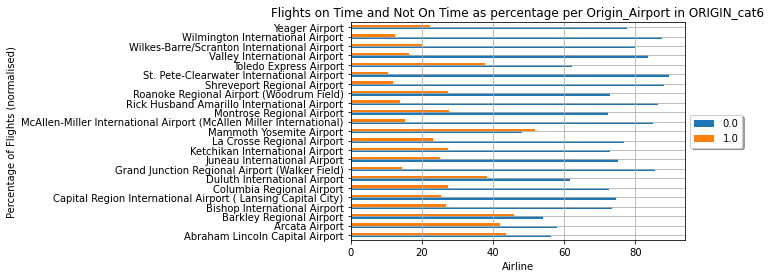

<Figure size 720x720 with 0 Axes>

None


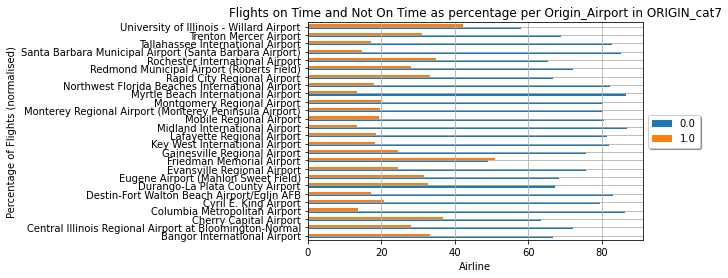

<Figure size 720x720 with 0 Axes>

None


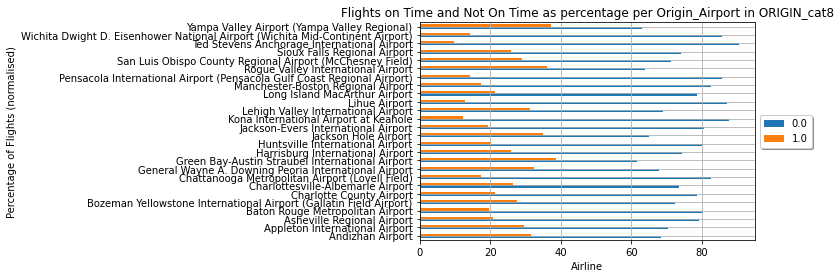

<Figure size 720x720 with 0 Axes>

None


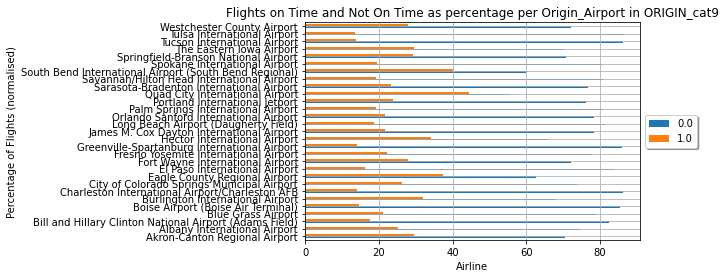

<Figure size 720x720 with 0 Axes>

None


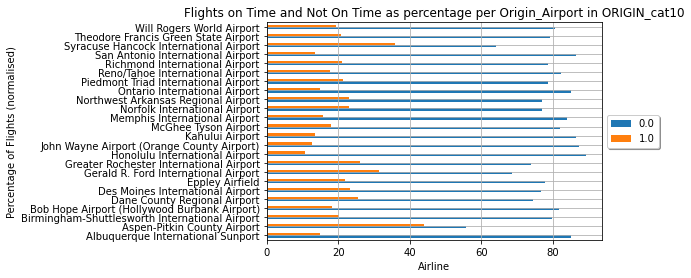

<Figure size 720x720 with 0 Axes>

None


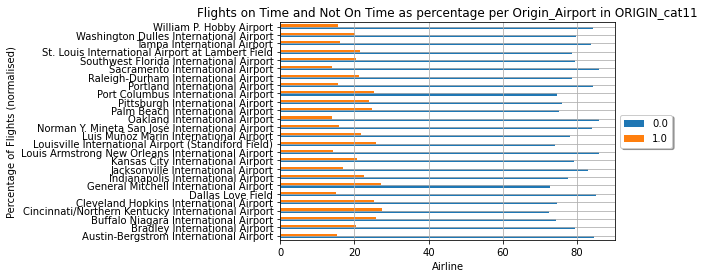

<Figure size 720x720 with 0 Axes>

None


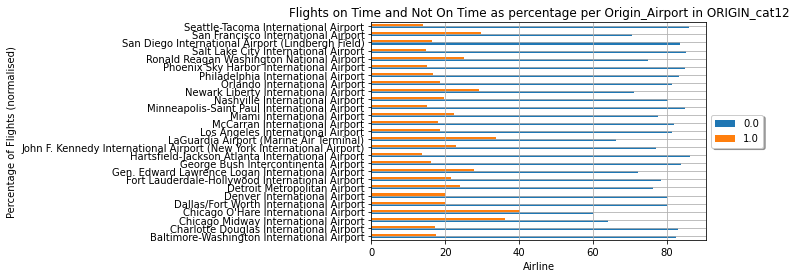

<Figure size 720x720 with 0 Axes>

None


In [29]:
# number of delays per Origin_Airport as percentage of number of flights
# Graph

for i in range(cats):
    airlines_cat = df1.loc[df1['ORIGIN_cat'].values == i]
    graph = (pd.crosstab(airlines_cat['Origin_Airport'],airlines_cat['ARR_DEL15'], normalize='index').round(4)*100).plot.barh()
    graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True)
    plt.title(f"Flights on Time and Not On Time as percentage per Origin_Airport in ORIGIN_cat{i}")
    plt.xlabel("Airline")
    plt.ylabel("Percentage of Flights (normalised)")
    plt.grid(True)
    plt.figure(figsize=(10, 10))
    plt.tight_layout()
    print(plt.show())

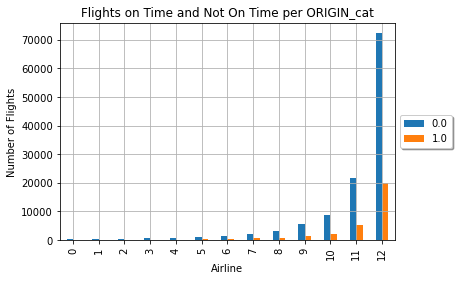

<Figure size 720x720 with 0 Axes>

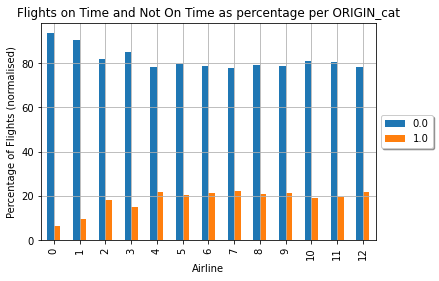

<Figure size 720x720 with 0 Axes>

In [30]:
# Graph Origin Airport
graph = pd.crosstab(df1['ORIGIN_cat'],df1['ARR_DEL15']).plot.bar()
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True)

plt.title("Flights on Time and Not On Time per ORIGIN_cat")
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.grid(True)
plt.figure(figsize=(10, 10))
plt.tight_layout()

plt.show()


# number of delays per airline as percentage of number of flights
# airline_percents=df1[['AIRLINE','ARR_DEL15']].groupby('AIRLINE').agg(['mean','count']).sort_values(by=('ARR_DEL15','mean'), ascending=False)
# Graph
graph = (pd.crosstab(df1['ORIGIN_cat'],df1['ARR_DEL15'], normalize='index').round(4)*100).plot.bar()
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True)
plt.title("Flights on Time and Not On Time as percentage per ORIGIN_cat")
plt.xlabel("Airline")
plt.ylabel("Percentage of Flights (normalised)")
plt.grid(True)
plt.figure(figsize=(10, 10))
plt.tight_layout()

plt.show()

In [40]:
#print(df1.isnull().sum())
for i in range(cats):
    print(f"Cat {i} has {(len(df1.loc[df1['DEST_cat'].values == i]))} values")

Cat 0 has 390 values
Cat 1 has 564 values
Cat 2 has 767 values
Cat 3 has 434 values
Cat 4 has 917 values
Cat 5 has 1109 values
Cat 6 has 1969 values
Cat 7 has 2118 values
Cat 8 has 4436 values
Cat 9 has 5924 values
Cat 10 has 12394 values
Cat 11 has 26606 values
Cat 12 has 92372 values


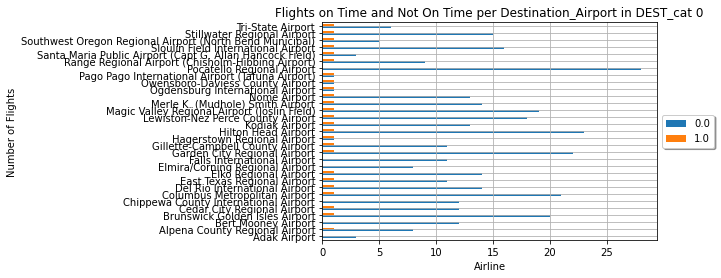

<Figure size 720x720 with 0 Axes>

None


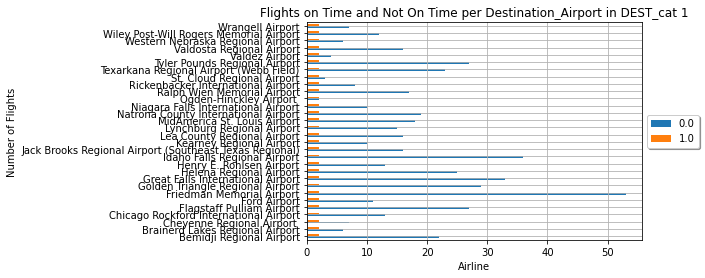

<Figure size 720x720 with 0 Axes>

None


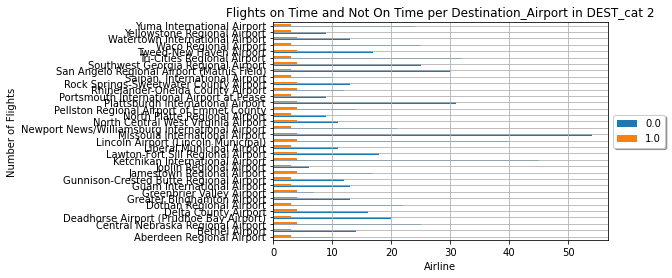

<Figure size 720x720 with 0 Axes>

None


In [32]:
# number of delays per Origin_Airport as total of number of flights
# Graph

for i in range(cats):
    airlines_cat = df1.loc[df1['DEST_cat'].values == i]
    graph = pd.crosstab(airlines_cat['Destination_Airport'],airlines_cat['ARR_DEL15']).plot.barh()
    graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True)
    plt.title(f"Flights on Time and Not On Time per Destination_Airport in DEST_cat {i}")
    plt.xlabel("Airline")
    plt.ylabel("Number of Flights")
    plt.grid(True)
    plt.figure(figsize=(10, 10))
    plt.tight_layout()
    print(plt.show())

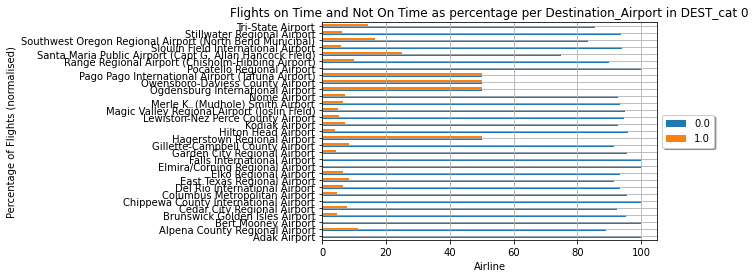

<Figure size 720x720 with 0 Axes>

None


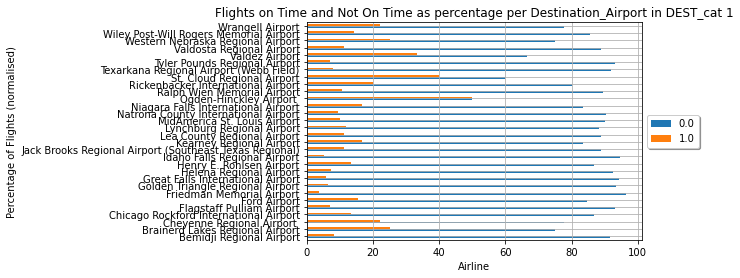

<Figure size 720x720 with 0 Axes>

None


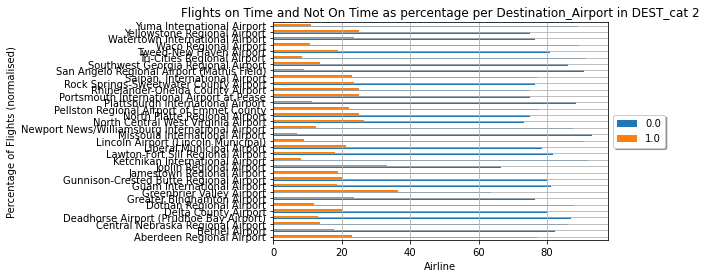

<Figure size 720x720 with 0 Axes>

None


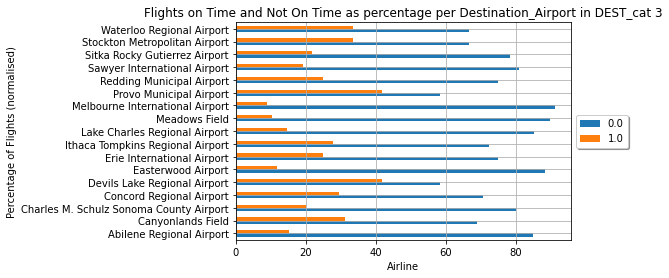

<Figure size 720x720 with 0 Axes>

None


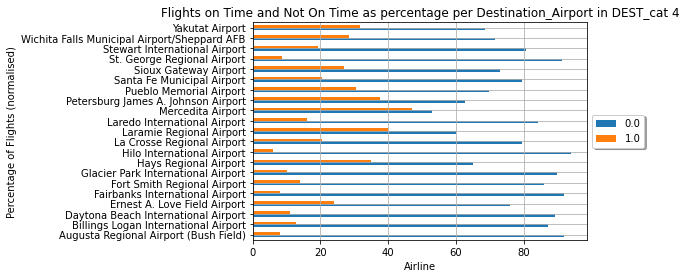

<Figure size 720x720 with 0 Axes>

None


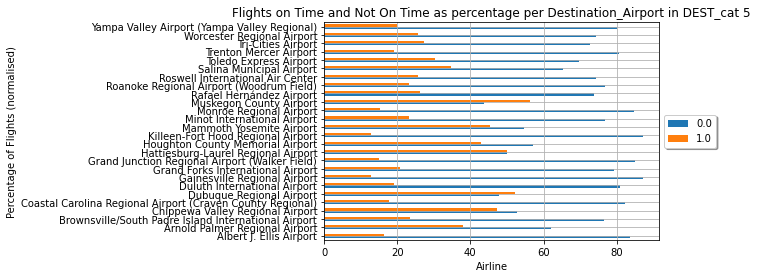

<Figure size 720x720 with 0 Axes>

None


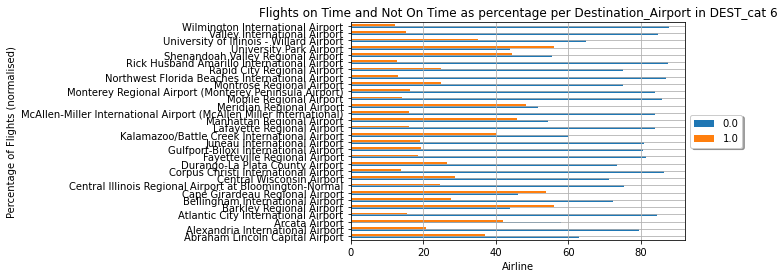

<Figure size 720x720 with 0 Axes>

None


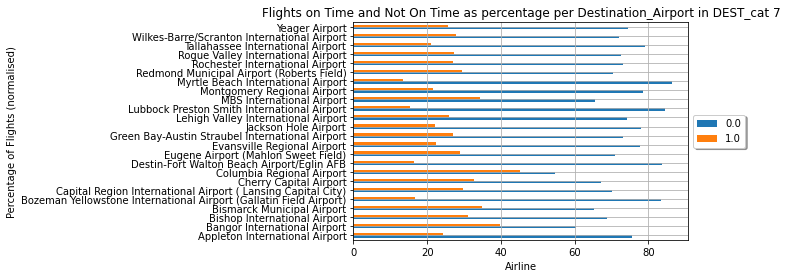

<Figure size 720x720 with 0 Axes>

None


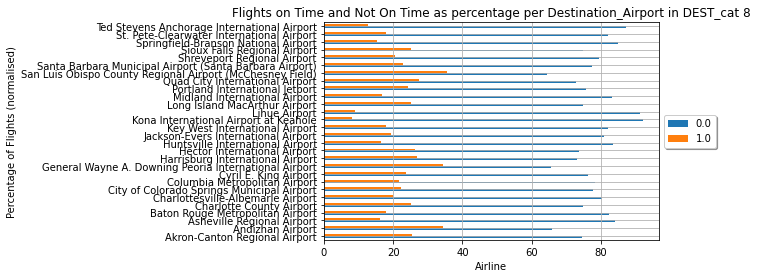

<Figure size 720x720 with 0 Axes>

None


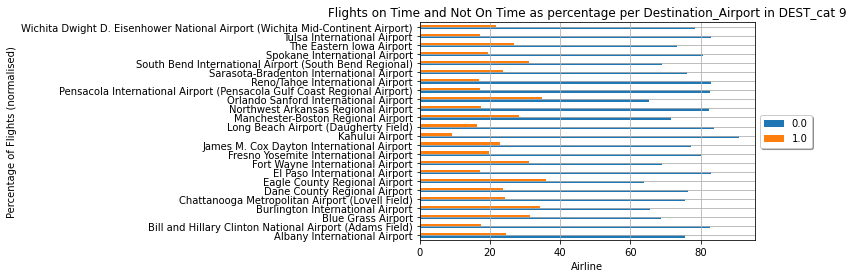

<Figure size 720x720 with 0 Axes>

None


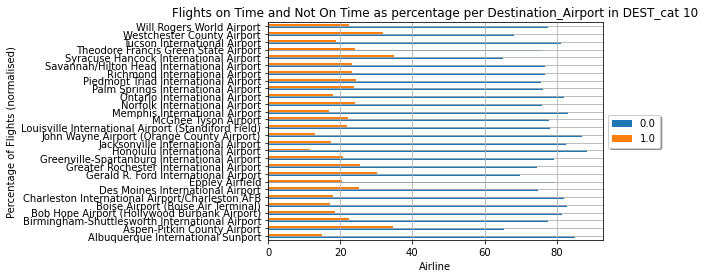

<Figure size 720x720 with 0 Axes>

None


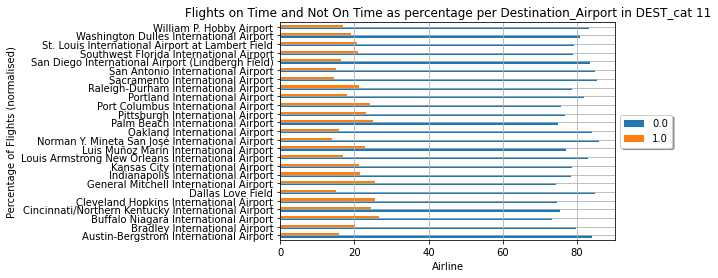

<Figure size 720x720 with 0 Axes>

None


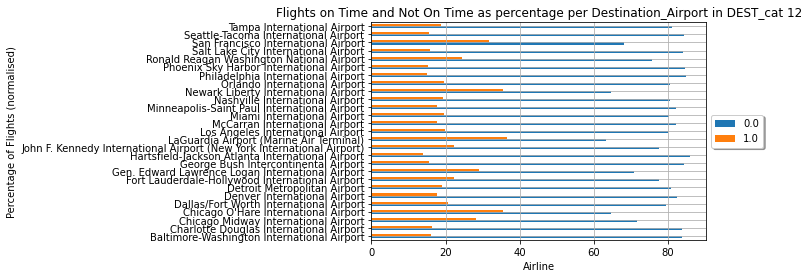

<Figure size 720x720 with 0 Axes>

None


In [33]:
# number of delays per Origin_Airport as percentage of number of flights
# Graph

for i in range(cats):
    airlines_cat = df1.loc[df1['DEST_cat'].values == i]
    graph = (pd.crosstab(airlines_cat['Destination_Airport'],airlines_cat['ARR_DEL15'], normalize='index').round(4)*100).plot.barh()
    graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True)
    plt.title(f"Flights on Time and Not On Time as percentage per Destination_Airport in DEST_cat {i}")
    plt.xlabel("Airline")
    plt.ylabel("Percentage of Flights (normalised)")
    plt.grid(True)
    plt.figure(figsize=(10, 10))
    plt.tight_layout()
    print(plt.show())

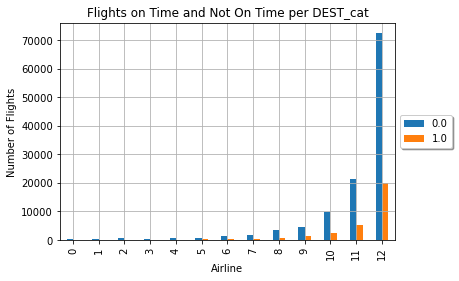

<Figure size 720x720 with 0 Axes>

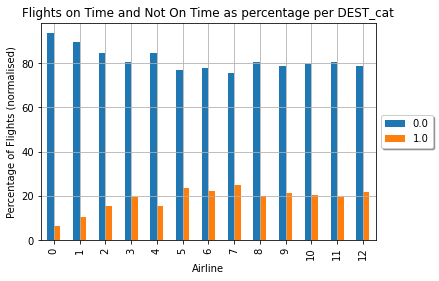

<Figure size 720x720 with 0 Axes>

In [34]:
# Graph Destination Airport
graph = pd.crosstab(df1['DEST_cat'],df1['ARR_DEL15']).plot.bar()
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True)

plt.title("Flights on Time and Not On Time per DEST_cat")
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.grid(True)
plt.figure(figsize=(10, 10))
plt.tight_layout()

plt.show()


# number of delays per airline as percentage of number of flights
# airline_percents=df1[['AIRLINE','ARR_DEL15']].groupby('AIRLINE').agg(['mean','count']).sort_values(by=('ARR_DEL15','mean'), ascending=False)
# Graph
graph = (pd.crosstab(df1['DEST_cat'],df1['ARR_DEL15'], normalize='index').round(4)*100).plot.bar()
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True)
plt.title("Flights on Time and Not On Time as percentage per DEST_cat")
plt.xlabel("Airline")
plt.ylabel("Percentage of Flights (normalised)")
plt.grid(True)
plt.figure(figsize=(10, 10))
plt.tight_layout()

plt.show()

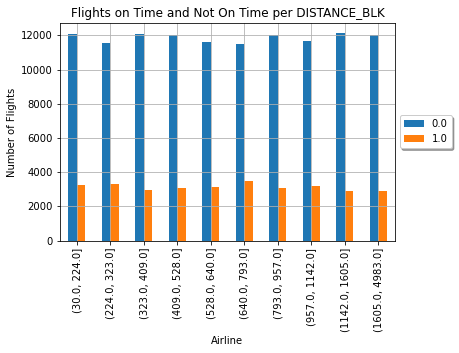

<Figure size 720x720 with 0 Axes>

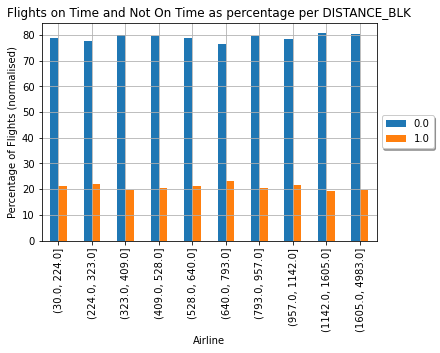

<Figure size 720x720 with 0 Axes>

In [35]:
# Finally, Delays in respect to distance.

# Graph Destination Airport
graph = pd.crosstab(df1['DISTANCE_BLK'],df1['ARR_DEL15']).plot.bar()
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True)
plt.title("Flights on Time and Not On Time per DISTANCE_BLK")
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.grid(True)
plt.figure(figsize=(10, 10))
plt.tight_layout()

plt.show()


# number of delays per airline as percentage of number of flights
# airline_percents=df1[['AIRLINE','ARR_DEL15']].groupby('AIRLINE').agg(['mean','count']).sort_values(by=('ARR_DEL15','mean'), ascending=False)
# Graph
graph = (pd.crosstab(df1['DISTANCE_BLK'],df1['ARR_DEL15'], normalize='index').round(4)*100).plot.bar()
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True)
plt.title("Flights on Time and Not On Time as percentage per DISTANCE_BLK")
plt.xlabel("Airline")
plt.ylabel("Percentage of Flights (normalised)")
plt.grid(True)
plt.figure(figsize=(10, 10))
plt.tight_layout()

plt.show()


In [36]:
### END OF DATASET MODIFICATION
# Save the updated dataframe to a new .csv for use in Machine Learning Models
df1.to_csv("../datasets/Jan_2019_ontime_modified.csv", index = False)

In [37]:
"""
What Insights and Conclusions can we get from the data?

"""

'\nWhat Insights and Conclusions can we get from the data?\n\n'